In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:

# Load the dataset
data = pd.read_csv('halfcleanDataset.csv')

# Display the first few rows of the dataset
data.head()


/var/folders/ns/41ddq7k52x11_1f3_004md3h0000gn/T/ipykernel_86989/1045263607.py:4: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('halfcleanDataset.csv')


,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,0,2018,2,6,28,4,2018-06-28,AA,19805,AA,...,2174.0,9,0.0,129.0,8.0,0.0,0.0,NaN,NaN,NaN
1,1,2018,2,6,29,5,2018-06-29,AA,19805,AA,...,2174.0,9,0.0,21.0,5.0,0.0,6.0,NaN,NaN,NaN
2,2,2018,2,6,30,6,2018-06-30,AA,19805,AA,...,2174.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018,2,6,1,5,2018-06-01,AA,19805,AA,...,529.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018,2,6,2,6,2018-06-02,AA,19805,AA,...,529.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Data summary: size, column types, and missing values
data_summary = {
    "Total Rows": data.shape[0],
    "Total Columns": data.shape[1],
    "Column Types": data.dtypes.value_counts(),
    "Missing Values": data.isnull().sum().sort_values(ascending=False)
}

data_summary["Missing Values"] = data_summary["Missing Values"][data_summary["Missing Values"] > 0]

data_summary["Column Types"], data_summary["Missing Values"][:10]  # Display top 10 columns with missing values


(float64    29
 int64      16
 object     13
 dtype: int64,
 TotalAddGTime         33425707
 LongestAddGTime       33425706
 FirstDepTime          33425687
 CancellationCode      32756402
 LateAircraftDelay     27786940
 NASDelay              27786940
 WeatherDelay          27786940
 CarrierDelay          27786940
 SecurityDelay         27786940
 ArrivalDelayGroups      961630
 dtype: int64)

In [12]:
# Descriptive statistics for numerical columns
numerical_stats = data.describe()

numerical_stats.transpose()  # Transposing for better readability


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,33638832.0,1.681942e+07,9.710694e+06,0.0,8409707.75,16819415.5,25229123.25,33638831.0
Year,33638832.0,2.019936e+03,1.454011e+00,2018.0,2019.00,2020.0,2021.00,2022.0
Quarter,33638832.0,2.482058e+00,1.112396e+00,1.0,1.00,3.0,3.00,4.0
Month,33638832.0,6.428698e+00,3.394326e+00,1.0,3.00,7.0,9.00,12.0
DayofMonth,33638832.0,1.574644e+01,8.777112e+00,1.0,8.00,16.0,23.00,31.0
DayOfWeek,33638832.0,3.967122e+00,1.999035e+00,1.0,2.00,4.0,6.00,7.0
DOT_ID_Operating_Airline,33638832.0,2.000489e+04,3.872782e+02,19393.0,19790.00,19977.0,20378.00,21171.0
Flight_Number_Operating_Airline,33638832.0,2.690570e+03,1.824835e+03,1.0,1121.00,2305.0,4234.00,9888.0
OriginAirportID,33638832.0,1.266807e+04,1.527567e+03,10135.0,11292.00,12889.0,14057.00,16869.0
OriginStateFips,33638832.0,2.743342e+01,1.662478e+01,1.0,12.00,26.0,42.00,78.0


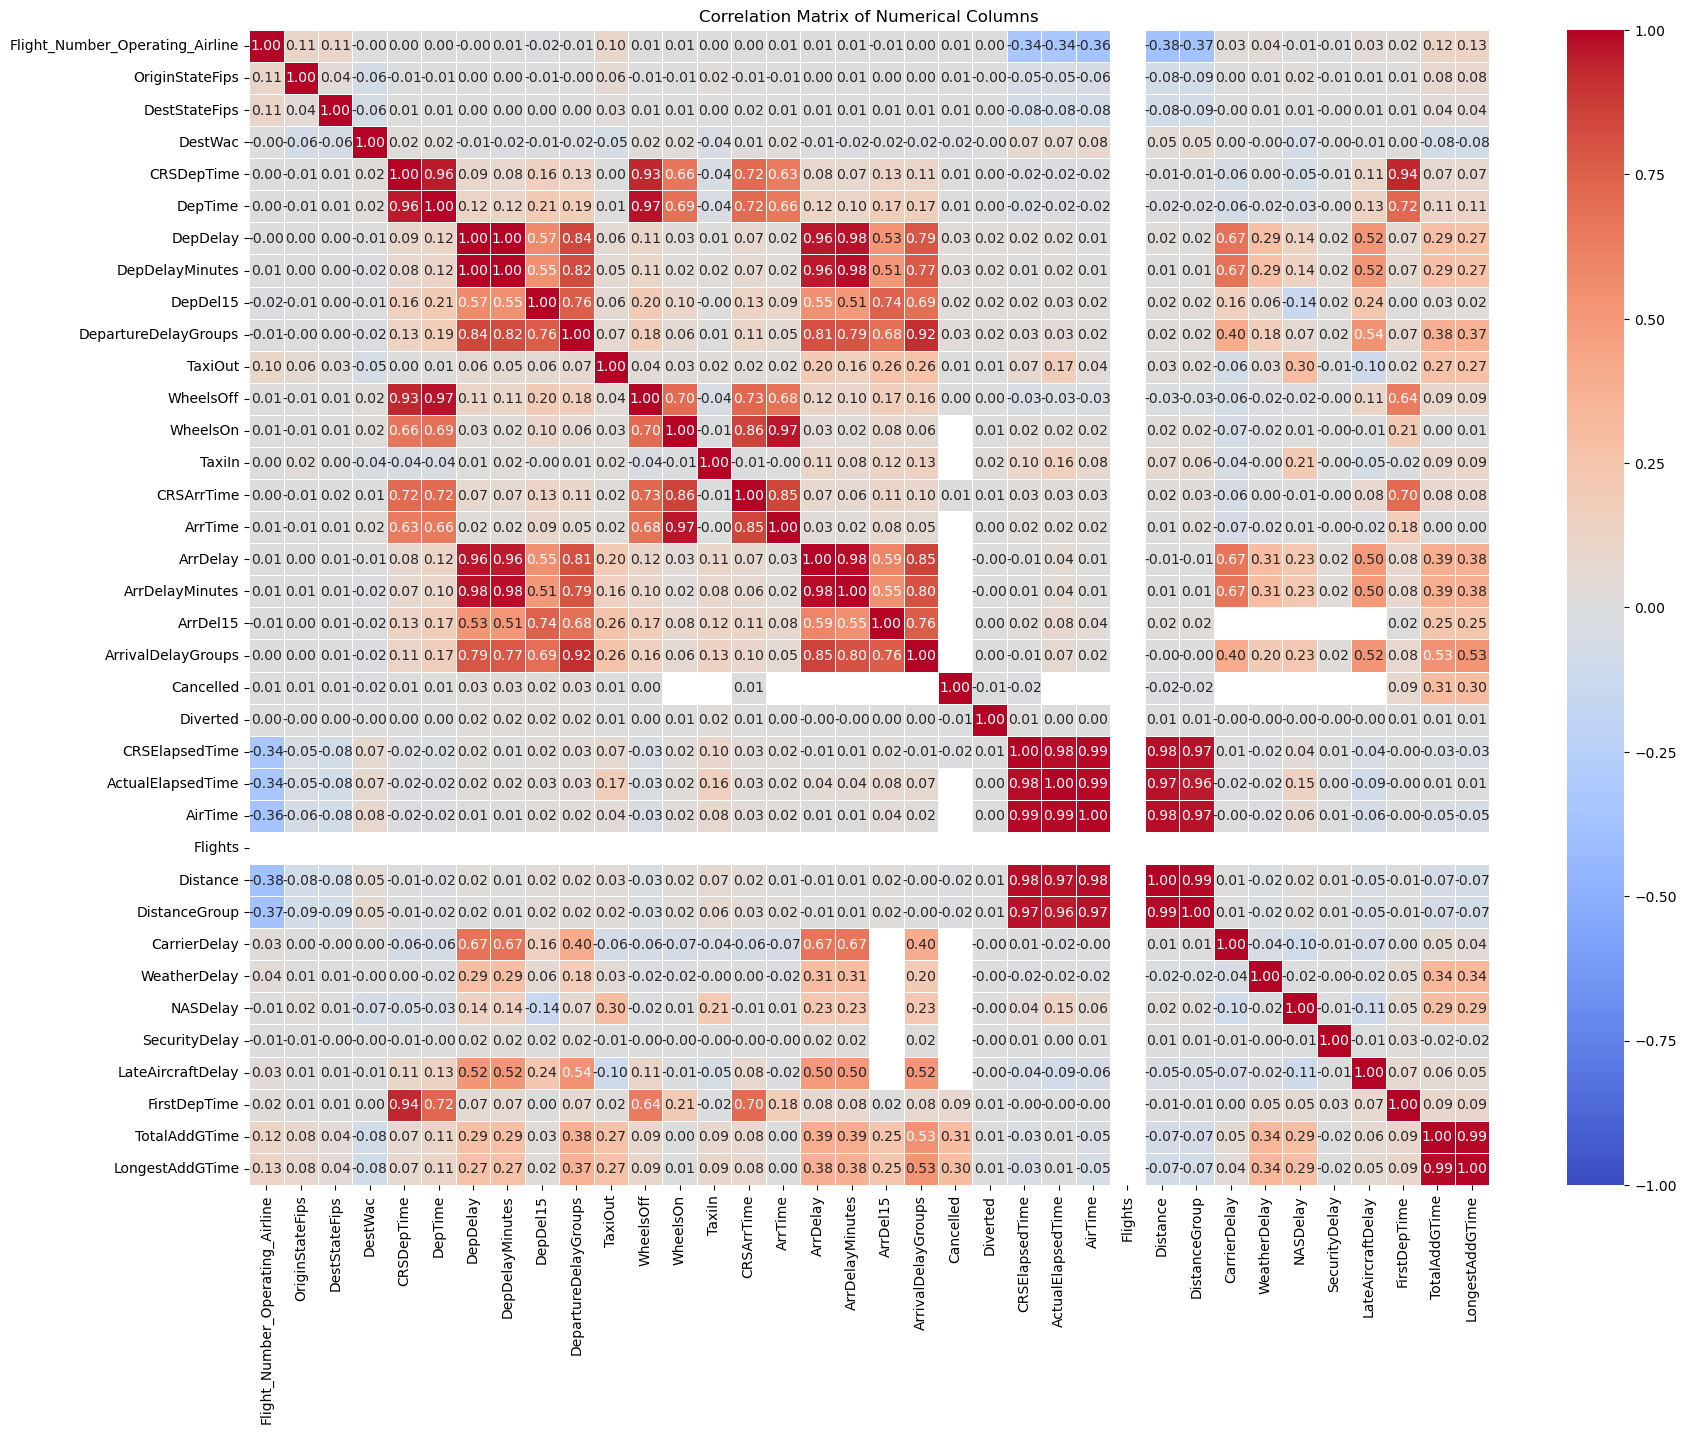

In [7]:
# Compute the correlation matrix for numerical columns
correlation_matrix = data[non_date_numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


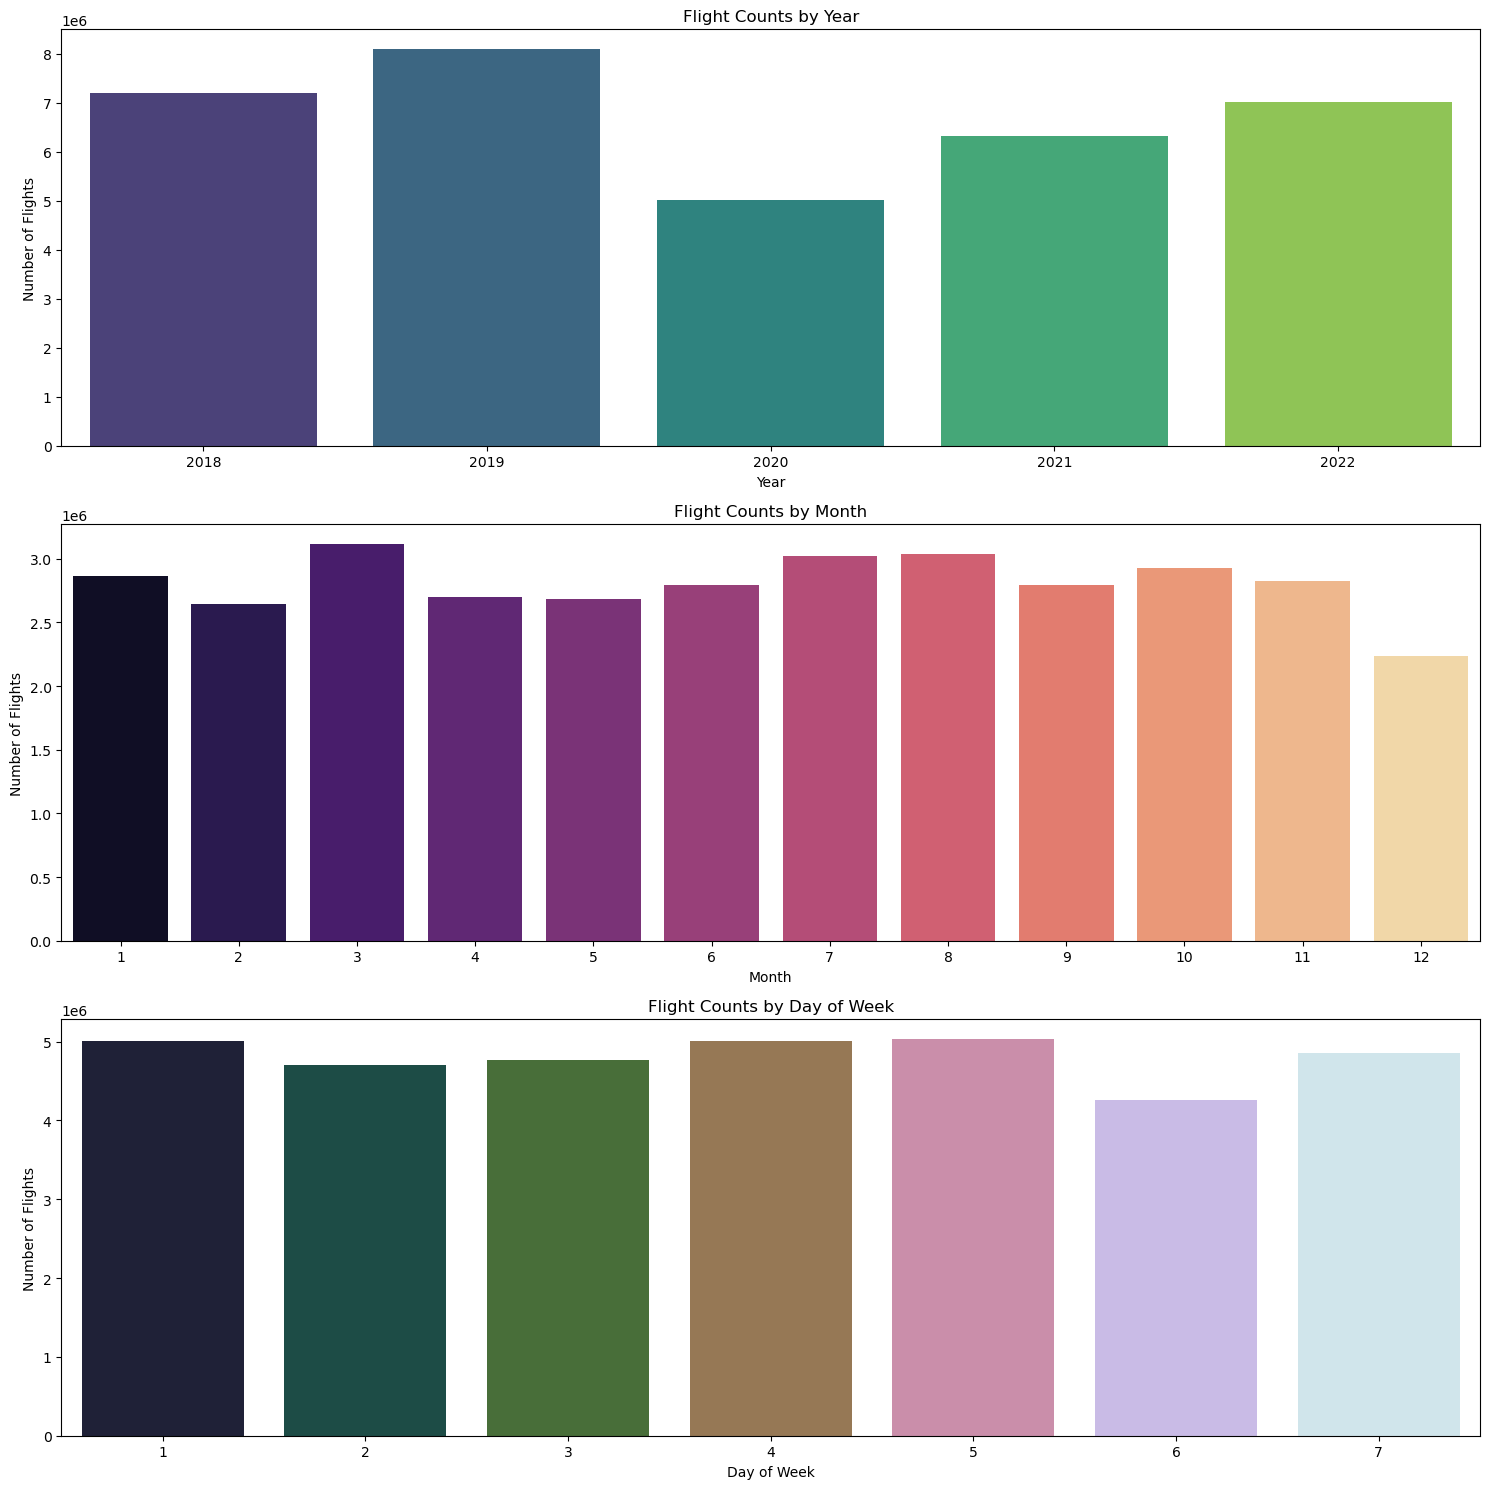

In [13]:
# Time series analysis: Trends over years, months, and days of the week
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Trend over years
sns.countplot(x='Year', data=data, ax=axes[0], palette='viridis')
axes[0].set_title('Flight Counts by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Flights')

# Trend over months
sns.countplot(x='Month', data=data, ax=axes[1], palette='magma')
axes[1].set_title('Flight Counts by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Flights')

# Trend over days of the week
sns.countplot(x='DayOfWeek', data=data, ax=axes[2], palette='cubehelix')
axes[2].set_title('Flight Counts by Day of Week')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Number of Flights')

plt.tight_layout()
plt.show()


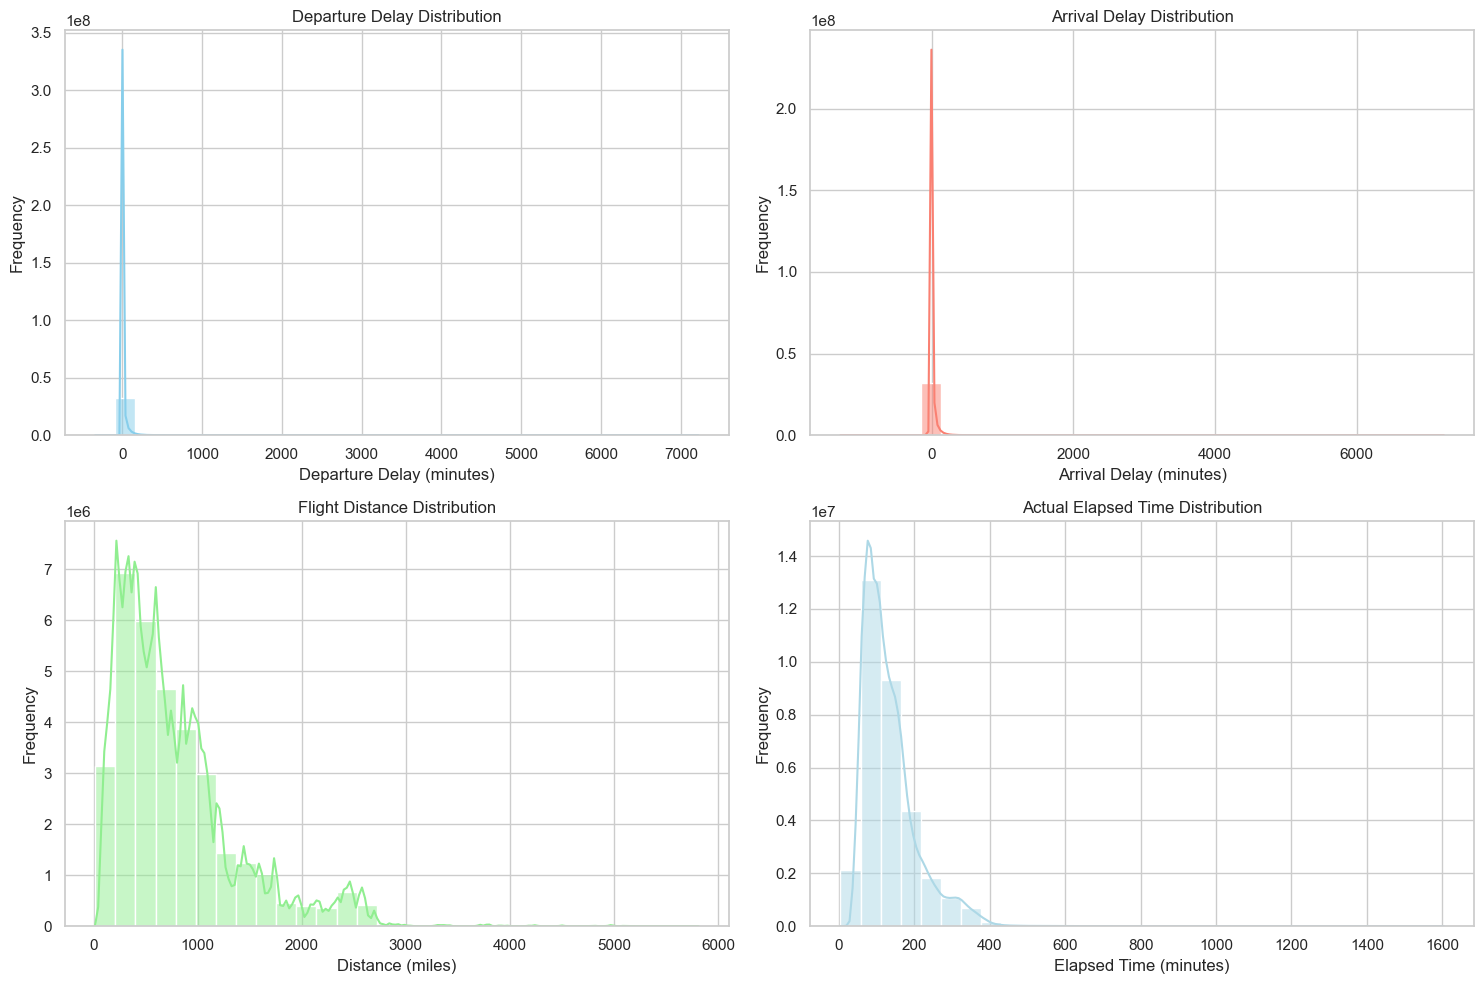

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for plots
sns.set(style="whitegrid")

# Distribution analysis of key variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Delay variables
sns.histplot(data['DepDelay'].dropna(), bins=30, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Departure Delay Distribution')
axes[0, 0].set_xlabel('Departure Delay (minutes)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(data['ArrDelay'].dropna(), bins=30, ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('Arrival Delay Distribution')
axes[0, 1].set_xlabel('Arrival Delay (minutes)')
axes[0, 1].set_ylabel('Frequency')

# Distance variable
sns.histplot(data['Distance'].dropna(), bins=30, ax=axes[1, 0], kde=True, color='lightgreen')
axes[1, 0].set_title('Flight Distance Distribution')
axes[1, 0].set_xlabel('Distance (miles)')
axes[1, 0].set_ylabel('Frequency')

# Elapsed time variable
sns.histplot(data['ActualElapsedTime'].dropna(), bins=30, ax=axes[1, 1], kde=True, color='lightblue')
axes[1, 1].set_title('Actual Elapsed Time Distribution')
axes[1, 1].set_xlabel('Elapsed Time (minutes)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


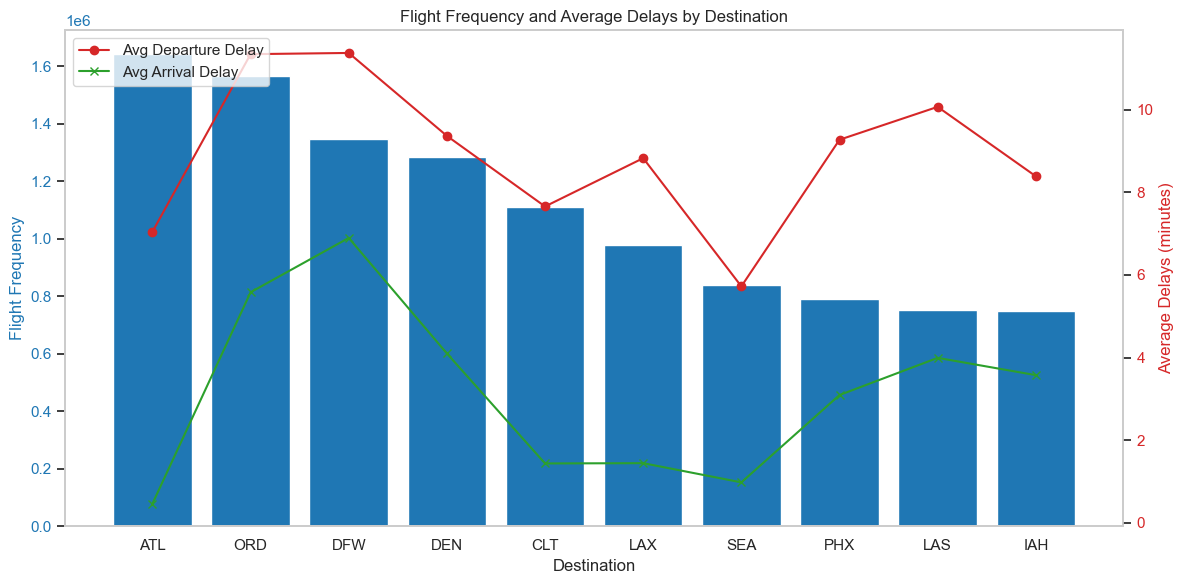

In [19]:
# Creating a new figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Turning off gridlines
ax1.grid(False)

# Plotting flight frequency as bars
color = 'tab:blue'
ax1.set_xlabel('Destination')
ax1.set_ylabel('Flight Frequency', color=color)
ax1.bar(destination_analysis.index, destination_analysis['Flight Frequency'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary axis for delays
ax2 = ax1.twinx()
ax2.grid(False)  # Turning off gridlines for the secondary axis
color = 'tab:red'
ax2.set_ylabel('Average Delays (minutes)', color=color)
ax2.plot(destination_analysis.index, destination_analysis['Average Departure Delay'], color=color, marker='o', label='Avg Departure Delay')
ax2.plot(destination_analysis.index, destination_analysis['Average Arrival Delay'], color='tab:green', marker='x', label='Avg Arrival Delay')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper left')

# Adding title and layout adjustments
plt.title('Flight Frequency and Average Delays by Destination')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
